In [ ]:
%matplotlib inline
from pylab import *

In [ ]:
from deficit_defs import *

Splikes version  0.1.4
Plasticnet version  0.1.12
macOS-14.4.1-arm64-arm-64bit
Base Image File: asdf/bbsk081604_all_scale2.asdf


In [ ]:
def inputs_to_images(X,buffer=5,scale_each_patch=False):
    ims=[]
    vmin=X.min()
    vmax=X.max()
    
    rf_size=int(np.sqrt(X.shape[1]/2))
    
    for xx in X:
        xx1=xx[:rf_size*rf_size].reshape(rf_size,rf_size)
        xx2=xx[rf_size*rf_size:].reshape(rf_size,rf_size)
        if scale_each_patch:
            vmax=max([xx1.max(),xx2.max()])
            vmin=max([xx1.min(),xx2.min()])
        
        im=np.concatenate((xx1,np.ones((rf_size,buffer))*vmax,xx2),axis=1)   
        ims.append(im)
        
    return ims


In [ ]:
blur=[-1,-1]
noise=[0.1,0.1]
rf_size=19
number_of_neurons=2
mu_c=0
sigma_c=0    
mu_r=0
sigma_r=0
total_time=8*day
save_interval=1*hour
_debug=False

if _debug:
    total_time=1*minute
    save_interval=1*second


images=[]
for bv in blur:
    if bv<=0:
        im=pi5.filtered_images(
                            base_image_file,
                            {'type':'dog','sd1':1,'sd2':3},
                            {'type':'norm'},
                            )
    else:
        im=pi5.filtered_images(
                                base_image_file,
                                {'type':'blur','size':bv},
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )
    images.append(im)




dt=200*ms      
eta=2e-6
pre1=pn.neurons.natural_images(images[0],
                                            rf_size=rf_size,
                                            time_between_patterns=dt,
                                            verbose=False)

pre2=pn.neurons.natural_images(images[0],
                                            rf_size=rf_size,
                                            other_channel=pre1,
                                            time_between_patterns=dt,
                                            verbose=False)


pre1+=pn.neurons.process.add_noise_normal(0,noise[0])
pre2+=pn.neurons.process.add_noise_normal(0,noise[1])

pre=pre1+pre2

post=default_post(number_of_neurons)
c=default_bcm(pre,post)
c.eta=eta

sim=pn.simulation(total_time)
sim.dt=dt

sim.monitor(post,['output'],save_interval)
sim.monitor(c,['weights','theta'],save_interval)

sim+=pn.grating_response(print_time=False)

seq=pn.Sequence()

seq+=sim,[pre,post],[c]

seq.run(display_hash=True)


 [#############################99% (ETA: 0.5 s)############################# ].] Sequence Time Elapsed...49.07 s


In [ ]:
base='sims/'
sfname='sims/_debug_nr.asdf'
pn.save(sfname,seq)

In [ ]:
R=Results(sfname)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


sims/_debug_nr.asdf


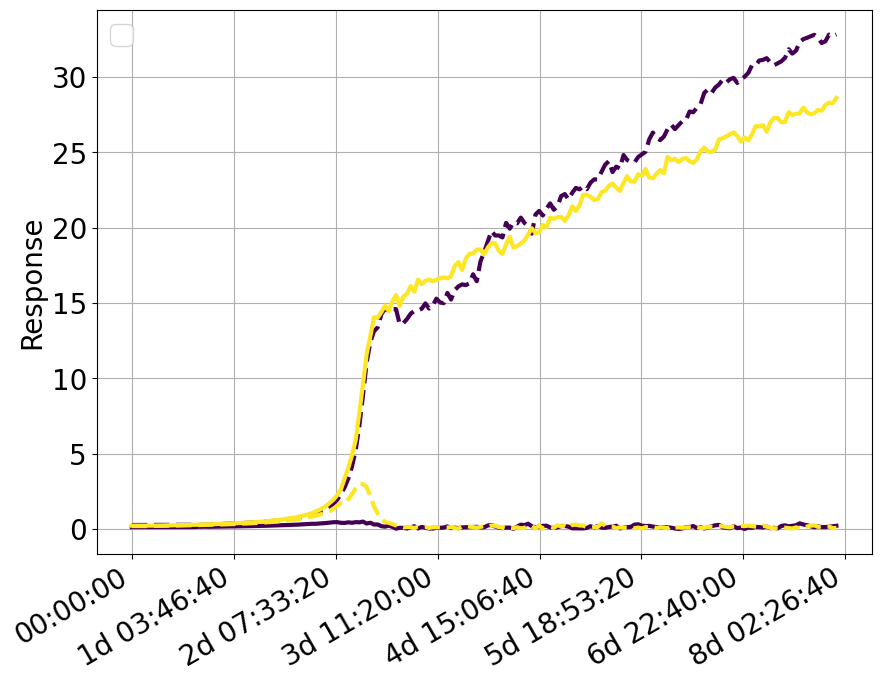

In [ ]:
import cycler

color = cm.viridis(np.linspace(0, 1,number_of_neurons))


for n in range(number_of_neurons):
    plot(R.t,R.y[:,n,0],'-',color=color[n])
    plot(R.t,R.y[:,n,1],'--',color=color[n])
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()  

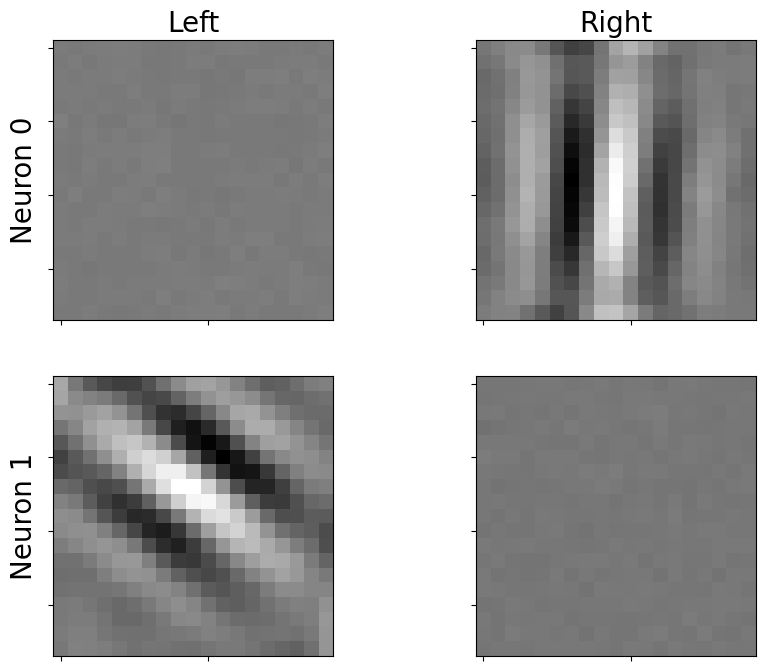

In [ ]:
R.plot_rf()

In [ ]:
ls asdf

bbsk081604_all.asdf          bbsk081604_all_log2dog.asdf
bbsk081604_all_RtoDOG.asdf   bbsk081604_all_scale2.asdf
bbsk081604_all_dog.asdf


Sim Time Elapsed...1.09 s


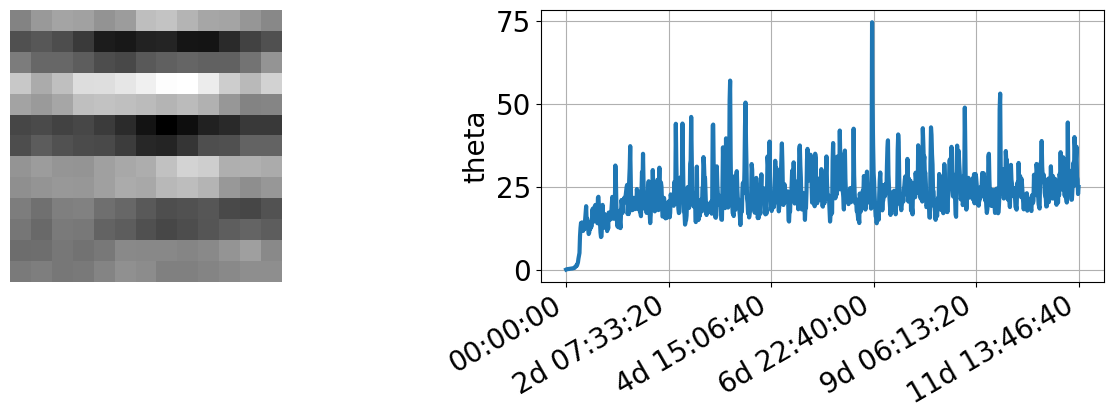

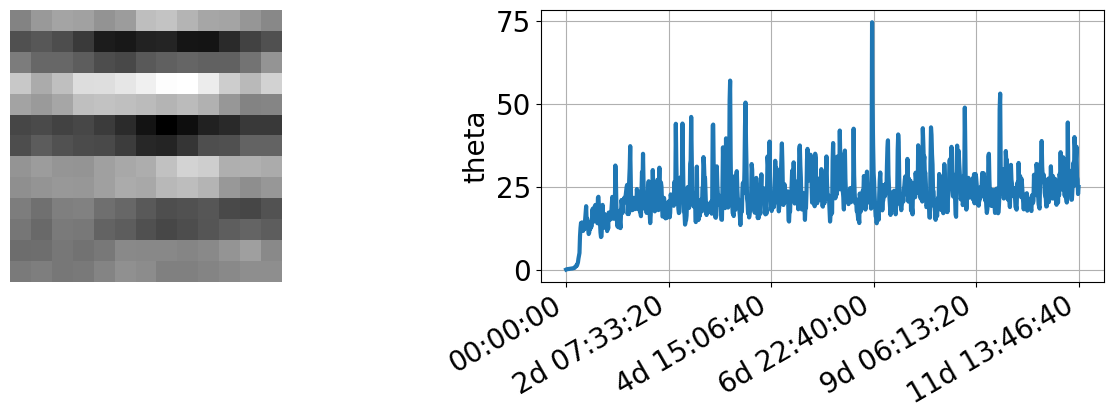

In [ ]:
pre=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',rf_size=13,verbose=False)
post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=pn.simulation(1000*1000)
sim.monitor(c,['weights','theta'],1000)

pn.run_sim(sim,[pre,post],[c],display_hash=False)

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c])

Sim Time Elapsed...0.83 s


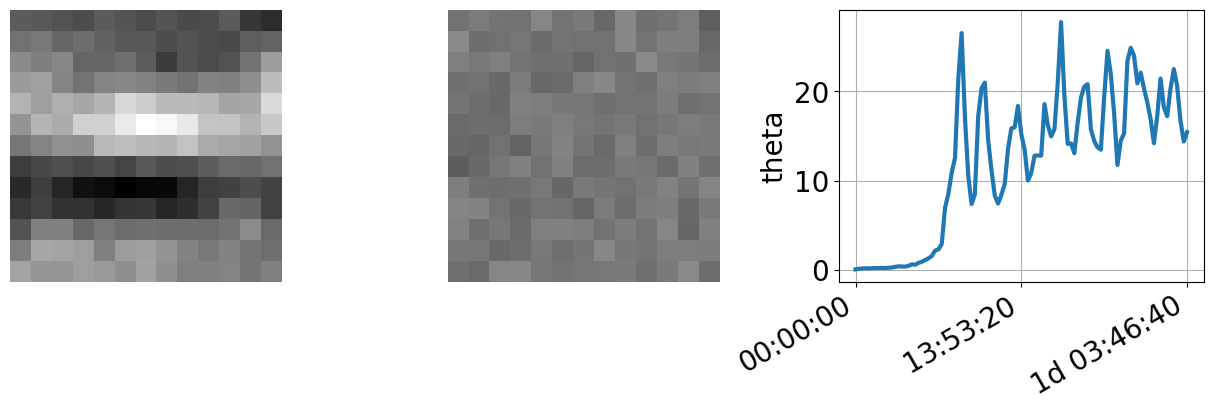

In [ ]:
pre1=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,verbose=False)

pre2=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,
                               other_channel=pre1,
                              verbose=False)


sigma=0.1
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=0.1
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2  # make a channel


post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=pn.simulation(1000*100)
sim.monitor(c,['weights','theta'],1000)

pn.run_sim(sim,[pre,post],[c],display_hash=False)

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c]);

In [ ]:
pre1=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,verbose=True)

pre2=pn.neurons.natural_images('asdf/bbsk081604_all_dog.asdf',
                               rf_size=13,
                               other_channel=pre1,
                              verbose=True)


sigma=0.1
pre1+=pn.neurons.process.add_noise_normal(0,sigma)

sigma=0.1
pre2+=pn.neurons.process.add_noise_normal(0,sigma)

pre=pre1+pre2  # make a channel


post=pn.neurons.linear_neuron(1)
post+=pn.neurons.process.min_max(0,500)

c=pn.connections.BCM(pre,post,[-.05,.05])
c.eta=5e-6
c.tau=1000

sim=pn.simulation(26)
sim.monitor(c,['weights','theta'],1000)
sim.monitor(pre,['output'],1)


pn.run_sim(sim,[pre,post],[c],display_hash=False)

pn.utils.plot_rfs_and_theta(sim,[pre,post],[c]);

In Update pattern neuronNatural Images
<class 'plasticnet.neurons.pattern_neuron.natural_images'>
IRead 118 images from asdf/bbsk081604_all_dog.asdf
[465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [465,630] [

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[252675,40] [252676,41] [252677,42] [252678,43] [252679,44] [252680,45] [252681,46] [252682,47] [252683,48] [252684,49] [252685,50] [252686,51] [252687,52] [253305,53] [253306,54] [253307,55] [253308,56] [253309,57] [253310,58] [253311,59] [253312,60] [253313,61] [253314,62] [253315,63] [253316,64] [253317,65] [253935,66] [253936,67] [253937,68] [253938,69] [253939,70] [253940,71] [253941,72] [253942,73] [253943,74] [253944,75] [253945,76] [253946,77] [253947,78] [254565,79] [254566,80] [254567,81] [254568,82] [254569,83] [254570,84] [254571,85] [254572,86] [254573,87] [254574,88] [254575,89] [254576,90] [254577,91] [255195,92] [255196,93] [255197,94] [255198,95] [255199,96] [255200,97] [255201,98] [255202,99] [255203,100] [255204,101] [255205,102] [255206,103] [255207,104] [255825,105] [255826,106] [255827,107] [255828,108] [255829,109] [255830,110] [255831,111] [255832,112] [255833,113] [255834,114] [255835,115] [255836,116] [255837,117] [256455,118] [256456,119] [256457,120] [256458

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
m=sim.monitors['output']
t,X=m.arrays()

In [ ]:
pre2.other

AttributeError: 'plasticnet.neurons.pattern_neuron.natural_images' object has no attribute 'other'

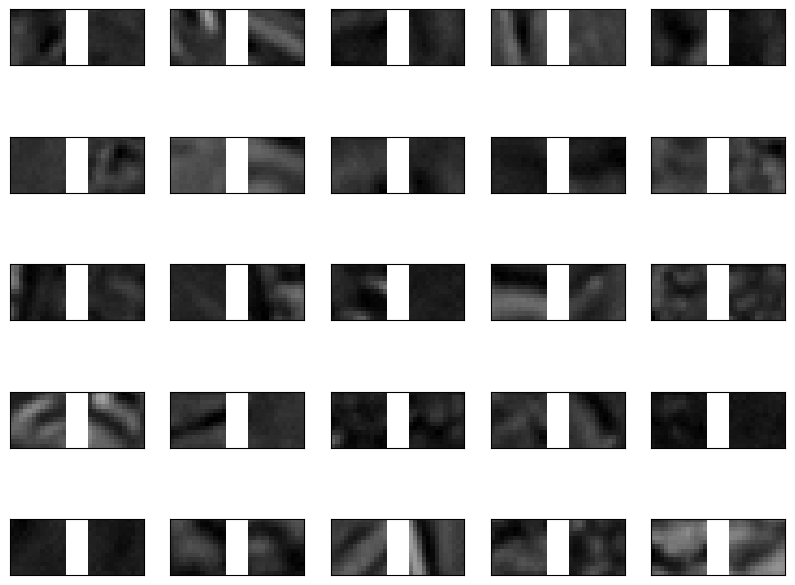

In [ ]:

for i in range(25):
    subplot(5,5,i+1)
    grid(False)
    gca().set_xticks([])
    gca().set_yticks([])
    imshow(im[i+1],cmap='gray')

In [ ]:
dir(pre1)

['N',
 '__add__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__radd__',
 '__reduce__',
 '__reduce_cython__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__setstate_cython__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_clean',
 '_reset',
 'buffer_size',
 'c',
 'connections_post',
 'connections_pre',
 'filename',
 'im',
 'linear_output',
 'name',
 'new_buffer',
 'new_pattern',
 'num_post',
 'num_pre',
 'number_of_patterns',
 'output',
 'p',
 'pattern',
 'pattern_number',
 'patterns',
 'post_process',
 'print_pattern',
 'r',
 'rf_size',
 'save',
 'save_attrs',
 'save_data',
 'sequential',
 'time_between_patterns',
 'time_to_next_pattern',
 'update',
 'use_other_channel',
 'verbose']

In [ ]:
pre2.use_other_channel

0